<h1> Extracting Stock Data Using a Python Library </h1>

In [42]:
#!pip install pandas==1.3.3
!pip install yfinance

^C


In [55]:
import yfinance as yf
import pandas as pd
import json
from matplotlib import pyplot as plt

<h2> Using the yfinance Library to Extract Stock Data</h2>
<p> Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.
</p>

In [56]:
apple = yf.Ticker("AAPL")
print(apple)

yfinance.Ticker object <AAPL>


<p> Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.</p>

<h3> Stock Info </h3>
<p> Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.<p>

In [57]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [58]:
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [59]:
apple_info['country']

'United States'

<h3> Extracting Share Price</h3>

<p> A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.</p>

In [60]:
apple_share_price_data = apple.history(period="max")

In [61]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099722,0.100155,0.099722,0.099722,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094953,0.094953,0.094519,0.094519,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.088015,0.088015,0.087582,0.087582,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089749,0.090183,0.089749,0.089749,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092351,0.092785,0.092351,0.092351,73449600,0.0,0.0


In [62]:
apple_share_price_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,10685.000000,10685.000000,10685.000000,10685.000000,1.068500e+04,10685.000000,10685.000000
mean,16.814127,17.007050,16.628189,16.825788,3.256480e+08,0.000661,0.001591
std,36.592452,37.037725,36.175466,36.627915,3.373374e+08,0.010720,0.084879
min,0.038588,0.038588,0.038154,0.038154,0.000000e+00,0.000000,0.000000
25%,0.238623,0.243965,0.233298,0.238944,1.196832e+08,0.000000,0.000000
50%,0.408689,0.416163,0.401624,0.408922,2.127720e+08,0.000000,0.000000
75%,14.953924,15.245845,14.850496,15.050189,4.054176e+08,0.000000,0.000000
max,181.299361,181.607100,177.814925,180.683868,7.421641e+09,0.230000,7.000000


<p> We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.
</p>

In [63]:
apple_share_price_data.reset_index(inplace=True) 

<p> We can plot the Open price against the Date:</p>

<AxesSubplot:xlabel='Date'>

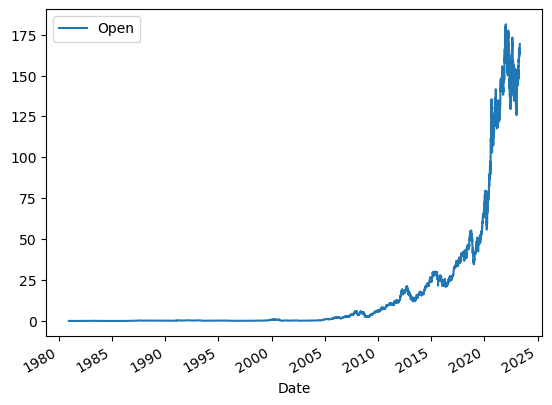

In [67]:
apple_share_price_dataplot(x="Date", y="Open")

<h3> Extracting Dividends </h3>

<p> Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.
</p>

In [65]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2022-02-04 00:00:00-05:00    0.220000
2022-05-06 00:00:00-04:00    0.230000
2022-08-05 00:00:00-04:00    0.230000
2022-11-04 00:00:00-04:00    0.230000
2023-02-10 00:00:00-05:00    0.230000
Name: Dividends, Length: 78, dtype: float64

<AxesSubplot:xlabel='Date'>

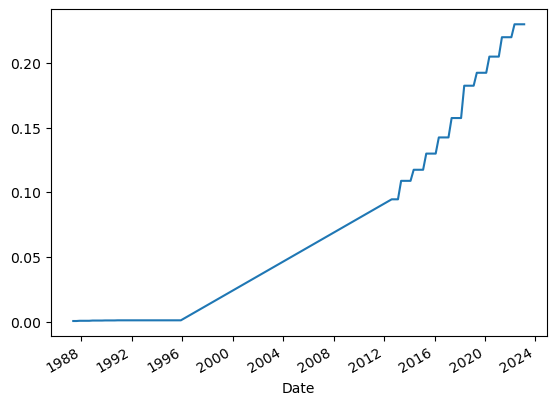

In [66]:
apple.dividends.plot()